In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
file1 = pd.read_csv('../DataSets/tsa_claims.csv')

C:\Users\Asus\AppData\Local\Temp\ipykernel_10580\1149291974.py:1: DtypeWarning: Columns (0,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  file1 = pd.read_csv('../DataSets/tsa_claims.csv')


In [3]:
file1.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


In [4]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(file1):
    # Drop duplicate rows across all columns
    file1 = file1.drop_duplicates()
    # Drop columns: 'Airport Name', 'Claim Type'
    file1 = file1.drop(columns=['Airport Name', 'Claim Type'])
    # Replace all instances of "[^\\d.]" with "" in columns: 'Claim Amount', 'Close Amount'
    file1['Claim Amount'] = file1['Claim Amount'].str.replace("[^\\d.]", "", case=False, regex=True)
    file1['Close Amount'] = file1['Close Amount'].str.replace("[^\\d.]", "", case=False, regex=True)
    # Drop rows with missing data in column: 'Claim Amount'
    file1 = file1.dropna(subset=['Claim Amount'])
    file1['Close Amount'] = np.where(file1['Status'] == 'Canceled', 0, np.where(file1['Status']=='Denied', 0, file1['Claim Amount']))
    file1['Claim Amount'] = pd.to_numeric(file1['Claim Amount'])
    file1['Close Amount'] = pd.to_numeric(file1['Close Amount'])
    # Drop rows with missing data in columns: 'Claim Amount', 'Close Amount'
    file1 = file1.dropna(subset=['Claim Amount', 'Close Amount'])
    file1['Disposition'] = np.where((pd.isna(file1['Disposition']) & (file1['Status'] == 'Canceled')), 'Cancel', file1['Status'])
    
    # Drop rows with missing data across all columns
    file1 = file1.dropna()
    return file1

file1_clean = clean_data(file1.copy())
file1_clean.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airline Name,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Continental Airlines,Checkpoint,Other,350.00,Approved,350.00,Approved
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,American Airlines,Checked Baggage,Cell Phones,278.88,Settled,278.88,Settled
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,American Airlines,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approved
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Delta (Song),Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approved
5,2005032479636,18-Feb-02,2/17/2005 0:00,CAK,Air Tran Airlines(do not use),Checked Baggage,Other,459.01,Settled,459.01,Settled


In [8]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(file1_clean):
    # Drop column: 'Claim Number'
    file1_clean = file1_clean.drop(columns=['Claim Number'])
    return file1_clean

file1_clean_1 = clean_data(file1_clean.copy())
file1_clean_1.head()

,Date Received,Incident Date,Airport Code,Airline Name,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,4-Jan-02,12/12/2002 0:00,EWR,Continental Airlines,Checkpoint,Other,350.00,Approved,350.00,Approved
2,4-Feb-02,11/26/2003 0:00,STL,American Airlines,Checked Baggage,Cell Phones,278.88,Settled,278.88,Settled
3,7-Feb-02,1/6/2003 0:00,MIA,American Airlines,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approved
4,18-Feb-02,2/5/2005 0:00,MCO,Delta (Song),Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approved
5,18-Feb-02,2/17/2005 0:00,CAK,Air Tran Airlines(do not use),Checked Baggage,Other,459.01,Settled,459.01,Settled


In [6]:
import ydata_profiling as yp

In [10]:
yp.ProfileReport(file1_clean_1)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
file1 = file1_clean_1

In [15]:
file1.duplicated().sum()

41

In [17]:
file1.drop_duplicates(inplace=True)

In [18]:
file1.duplicated().sum()

0

In [20]:
## Let's Check for the outliers.

numeric_col = file1.select_dtypes(include=['number'])

In [22]:
len(numeric_col.columns)

2

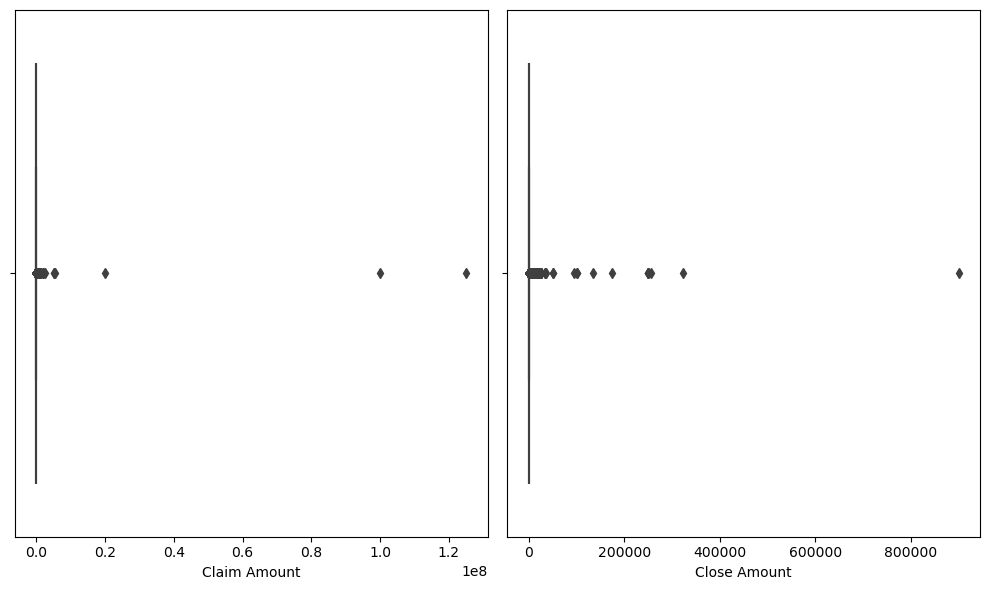

In [24]:
fig = plt.figure(figsize=(10,6))

for i, j in enumerate(numeric_col.columns):
    ax = plt.subplot(1,2,i+1)
    sns.boxplot(x=j, data=file1)
    plt.xlabel(j)
    
plt.tight_layout()
plt.show()